In [1]:
from text2brick.models import BrickRef
from text2brick.managers import SingleBrickLegoWorldManager
from text2brick.gym import LegoEnv
from text2brick.utils.WorldDataUtils import format_ldraw, save_ldr
from text2brick.dataset.dataset import Dataset
from text2brick.utils.ImageUtils import image_upscale, IoU

In [2]:
mapping_array_l = [
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 0, 0]
]

mapping_array_o = [
    [0, 1, 1, 1, 1, 0],
    [1, 1, 0, 0, 1, 1],
    [1, 1, 0, 0, 1, 1],
    [1, 1, 0, 0, 1, 1],
    [0, 1, 1, 1, 1, 0]
]

# brick_2x2 = BrickRef(file_id="3003.dat", name="2x2", color=15, h=24, w=20, d=20)
# lego_world = SingleBrickLegoWorldManager(mapping_array_l, brick_2x2, remove_illegal_brick_init=False)

# print(lego_world.data.str_full_infos())

# illegal_bricks = lego_world.check_illegal_bricks()

# if not illegal_bricks:
#     print("\nNo illegal bricks found")

# for brick in illegal_bricks:
#     brick_info, error_msg = brick
#     print("\nIllegal Brick", brick_info)
#     print("Error", error_msg)


In [3]:
#save_ldr(lego_world.data, "test_file_2x2_o")

In [4]:
dataset = Dataset()


{'validity': True, 'IoU': 0.03007518796992481, 'reward': 1.0150375939849625, 'steps': 3, 'brick': Brick(brick_id=3, x=10, y=0, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=24, w=20, d=20), connected_to=[])}
Lego World Bricks
id: 1 x: 140 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:24 | w:20 | d:20 | Connected to: []
id: 2 x: 150 | y: -24 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:24 | w:20 | d:20 | Connected to: [1]
id: 3 x: 10 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:24 | w:20 | d:20 | Connected to: []
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0

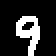

In [5]:
array, image = dataset.sample()

env = LegoEnv(array.shape[0])

observation, reward, done, info = env.step((27, 14), array)
observation, reward, done, info = env.step((26, 15), array)
observation, reward, done, info = env.step((27, 1), array)
print(info)
observation, reward, done, info = env.step((27, 2), array)
print(env.lego_world.data.str_full_infos())
print(observation)

image = image_upscale(image, 2)
image